# Project: FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:

# Write your code here
#code to display the head and tail of the dataframe, as well as the dimension 
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [5]:
df.shape

(1898, 9)

Observations: 


There are 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


Order_id, customer_id, food_preparation_time and delivery_time are integers, cost_of_the_order is a float while the restaurant_name, cuisine_type, day_of_the_week, rating are strings

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


There are no missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Average time required to prepare food once order is given
round(df['food_preparation_time'].mean(),2)

27.37

In [9]:
# Minimum time required to prepare food once order is given
df['food_preparation_time'].min()

20

In [10]:
# Maximum time required to prepare food once order is given
df['food_preparation_time'].max()

35

#### Observations:


The minimum, average, and maximum time it takes for food to be prepared once an order is placed are 20minutes, 27.37minutes and 35minutes respectively.

### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
# code to show the number of orders that were not rated
count=0
for x in df['rating']:
    if x=='Not given':
        count = count+1
print('The total number of orders that are not rated is', count)

The total number of orders that are not rated is 736


#### Observations:


736 orders were not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [5 marks]

Order ID

In [12]:
# check unique order ID
df['order_id'].nunique() 

1898

There are 1898 unique order ID, which means that all order ID are unique as this is the same as the number of rows in the dataframe.

Customer ID

In [13]:
# check unique customer ID
df['customer_id'].nunique()  ## Complete the code to find out number of unique Customer ID

1200

There are 1200 unique customer ID which means 1200 customers were captured in the dataframe.

Restaurant name

In [14]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  

178

There are 178 restaurants in the dataframe.

Cuisine Type

In [15]:
# Check unique cuisine type
df['cuisine_type'].nunique() 

14

There are 14 different cuisines in the dataframe.

Text(0.5, 1.0, 'Countplot showing cuisine type')

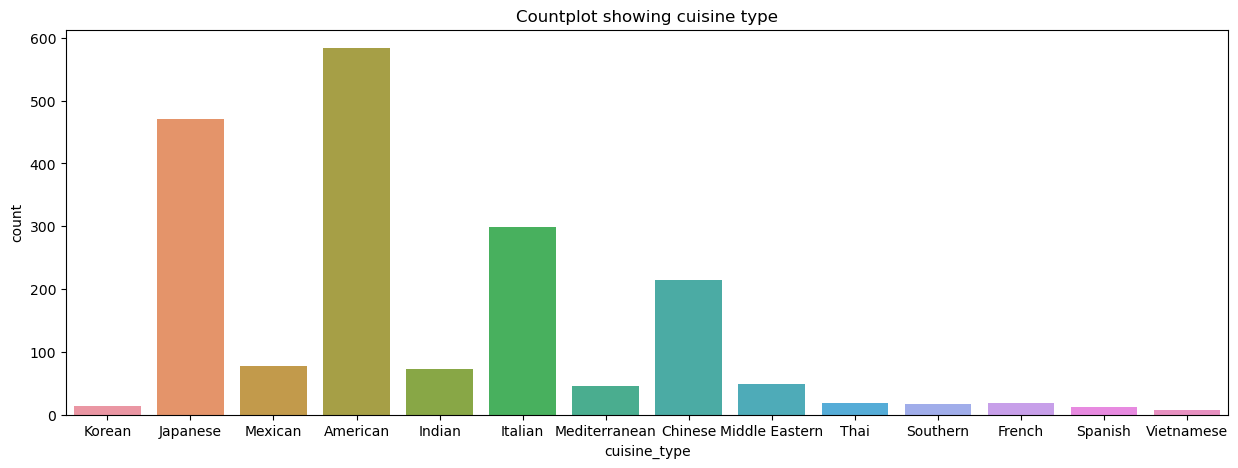

In [16]:
# A countplot for cuisine type.
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') 
plt.title('Countplot showing cuisine type')

In [17]:
cuisine_count = df['cuisine_type'].value_counts()
cuisine_count

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

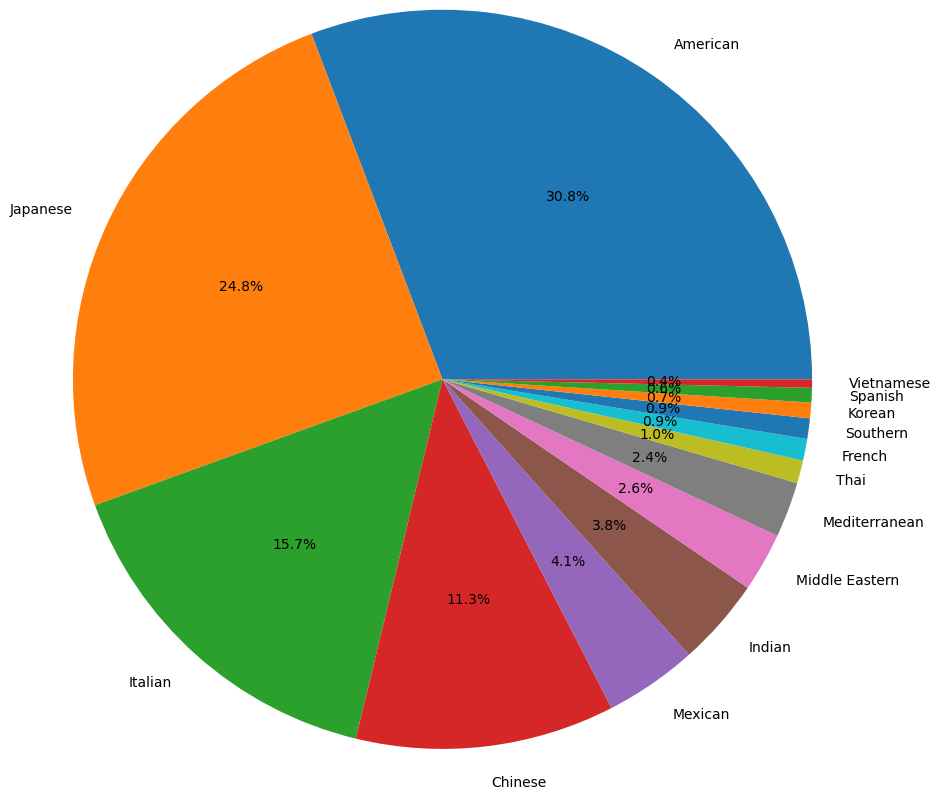

In [18]:
plt.pie(cuisine_count, labels=cuisine_count.index, radius=2.5 , autopct ='%1.1f%%')
plt.show()

The figures above are the countplot and piechart of Cuisine type and it shows that American had the highest number,followed by Japanese and the third highest was Italian while the fourth highest is Chinese. These four make up the bulk of the data. American and Japanese make up 55.6% of the total while America, Japanese, Italian and chinese make up 82.6% of the total cuisine type ordered in the data.

Cost of Order

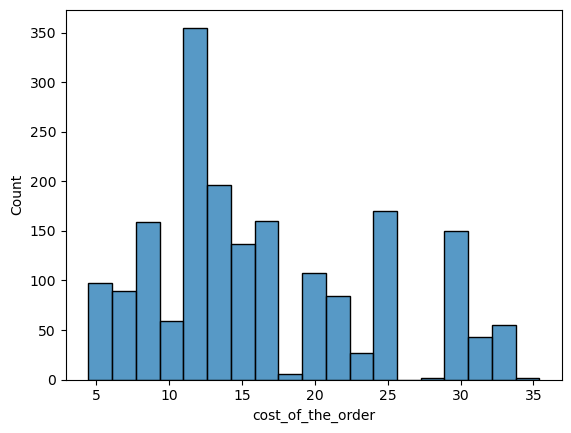

Lower whisker: 4.47
Upper whisker: 35.41


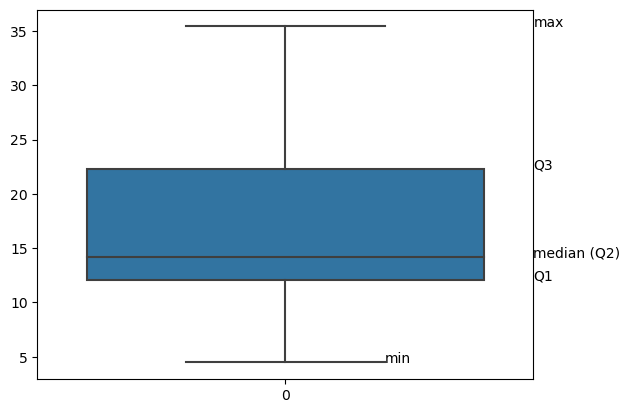

In [19]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
boxplot =sns.boxplot(df['cost_of_the_order']) ## Boxplot for the cost of order

# Get the min and max values
whiskers = [line.get_ydata()[1] for line in boxplot.get_lines() if line.get_linestyle() == '-']

# Print the quartile values
first_quartile = whiskers[0]
third_quartile = whiskers[1]

plt.text(x = 0.2, y = df['cost_of_the_order'].min(), s ='min')
plt.text(x = 0.5, y = df.cost_of_the_order.quantile(0.25), s ='Q1')
plt.text(x = 0.5, y = df['cost_of_the_order'].median(), s = 'median (Q2)')
plt.text(x = 0.5, y = df.cost_of_the_order.quantile(0.75), s ='Q3')
plt.text(x = 0.5, y = df['cost_of_the_order'].max(), s ='max')
print("Lower whisker:", whiskers[0])
print("Upper whisker:", whiskers[1])
plt.show()

In [20]:
df['cost_of_the_order'].median()

14.14

The minimum value of the cost of order is 4.47 and the maximum is 35.41 but the median is 14.14 as shown from the boxplot and histogram

Day of the week

In [21]:
# # Check the unique values
df['day_of_the_week'].nunique() 

2

<Axes: xlabel='day_of_the_week', ylabel='count'>

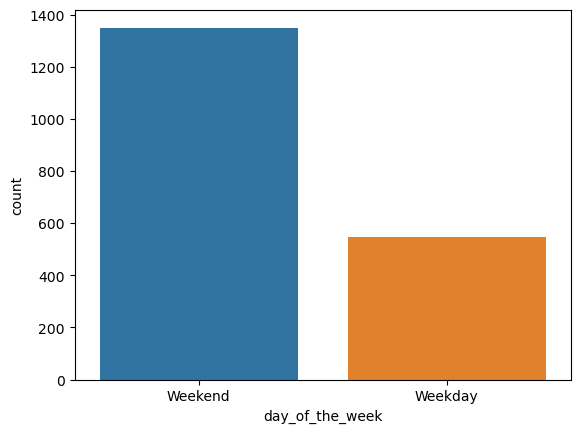

In [22]:
sns.countplot(data = df, x = 'day_of_the_week') ## Complete the code to plot a bar graph for 'day_of_the_week' column

This shows that more orders are placed on the weekend than during the week (weekdays). The orders placed during weekends is more than twice placed during the weekdays.

Rating

In [23]:
# Check the unique values
df['rating'].nunique()

4

<Axes: xlabel='rating', ylabel='count'>

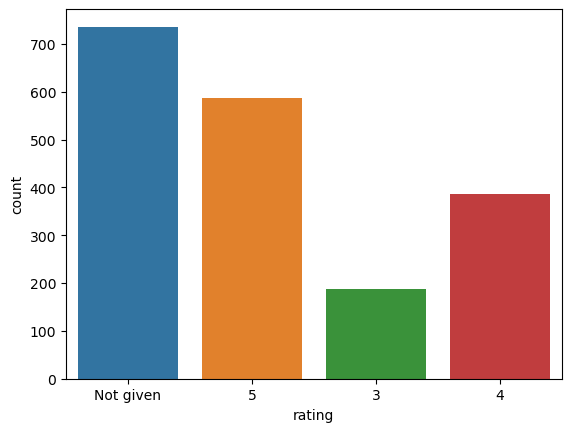

In [24]:
sns.countplot(data = df, x = 'rating') ## Complete the code to plot bar graph for 'rating' column

The number of people that doesnt rate the services have the highest, followed by the rating of 5,4 and 3 in descending order. There was no rating of 1 and 2, which shows the service is satisfactory to most people that rated the service but more efforts should be made to entice more people to rate.

Food preparation time

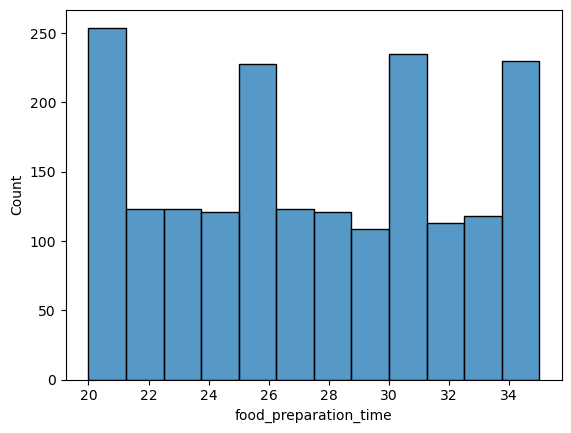

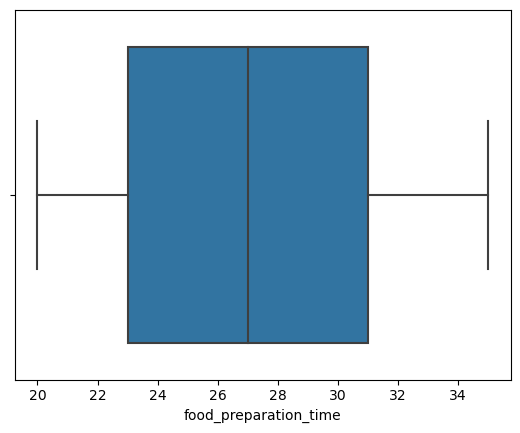

In [25]:
sns.histplot(data=df,x='food_preparation_time') ## Complete the code to plot the histogram for the food preparation time
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Complete the code to plot the boxplot for the cost of order
plt.show()

In [26]:
df['food_preparation_time'].mean()

27.371970495258168

In [27]:
df['food_preparation_time'].median()

27.0

In [28]:
df['food_preparation_time'].min()

20

In [29]:
df['food_preparation_time'].max()

35

The average food preparation time is 27.37minutes while the minimum is 20minutes and the maximum is 35 mkinutes.

Delivery Time

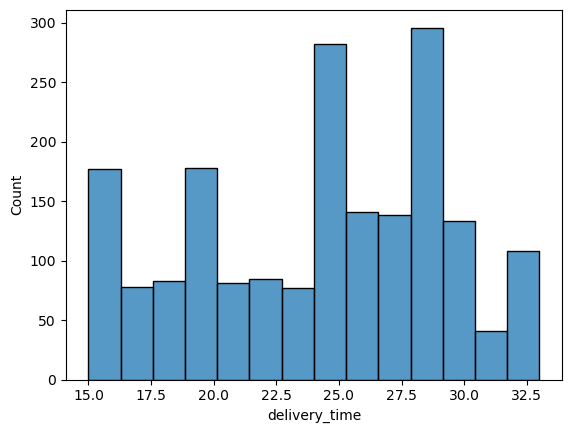

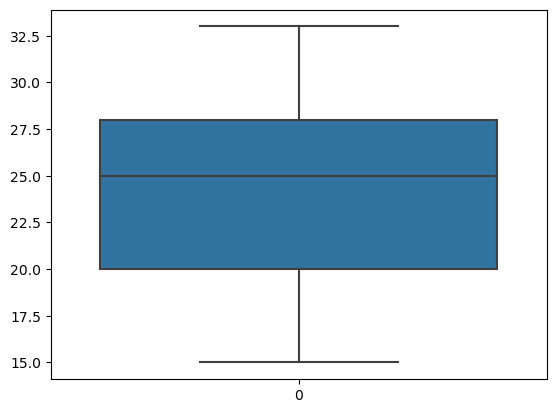

In [30]:
sns.histplot(data=df,x='delivery_time') ##  plot the histogram for the delivery time
plt.show()
sns.boxplot(df['delivery_time']) ##  plot the boxplot for the delivery time
plt.show()

In [31]:
df['delivery_time'].median()

25.0

In [32]:
df['delivery_time'].mean()

24.161749209694417

In [33]:
df['delivery_time'].min()

15

In [34]:
df['delivery_time'].max()

33

The minimum value of delivery time is 15minutes, the average is 24.16mins and the maximum is 33 minutes

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [35]:
# Write the code here
Restaurant = df['restaurant_name']
def calculate_frequency(lst):
    frequency = {}

    for item in lst:
        if item in frequency:
            frequency[item] += 1
        else:
            frequency[item] = 1

    return frequency


result_Q7 = calculate_frequency(Restaurant)

# Sort the frequencies in descending order
sorted_frequencies_restaurant = sorted(result_Q7.items(), key=lambda x: x[1], reverse=True)

# Get the top five elements with highest frequency
top_five = sorted_frequencies_restaurant[:5]

# Print the top five elements and their frequencies
for item, count in top_five:
    print(f"{item}: {count}")

Shake Shack: 219
The Meatball Shop: 132
Blue Ribbon Sushi: 119
Blue Ribbon Fried Chicken: 96
Parm: 68


#### Observations:


The top five restaurants in terms of the orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [36]:
# Write the code here
list_a=df['day_of_the_week']
list_b = df['cuisine_type']
list_c=[]
# This lists all the cousines on weekends
for x,y in zip(list_a,list_b):
    if x=='Weekend':
        list_c.append(y)
# show the frequency of the cuisine on weekends
result_Q8 = calculate_frequency(list_c)

for item, count in result_Q8.items():
    print(f"{item}: {count}")

Korean: 11
Japanese: 335
American: 415
Italian: 207
Mexican: 53
Mediterranean: 32
Chinese: 163
Indian: 49
Thai: 15
Southern: 11
French: 13
Spanish: 11
Middle Eastern: 32
Vietnamese: 4


#### Observations:


The most popular cuisine on Weekend is American.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [1 marks]

In [37]:

# code to show the number of orders that costs more than 20 dollars
count_20=0
for x in df['cost_of_the_order']:
    if x>20:
        count_20 = count_20+1
print('The total number of orders that cost more than 20usd is ', count_20, '. The percentage of orders that cost more than 20 is',round((count_20*100/1898),4))

The total number of orders that cost more than 20usd is  555 . The percentage of orders that cost more than 20 is 29.2413


#### Observations:


The percentage of orders that cost more than 20 dollars is 29.2413%. 

### **Question 10**: What is the mean order delivery time? [1 mark]

In [38]:
# Calculate the mean order delivery time. Note that time is usually expressed to 2 decimal places
round(df['delivery_time'].mean(),2)

24.16

#### Observations:


The mean order delivery time is 24.16minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [39]:
x11=df['customer_id']

def calculate_frequency(lst):
    frequency = {}

    for item in lst:
        if item in frequency:
            frequency[item] += 1
        else:
            frequency[item] = 1

    return frequency


result = calculate_frequency(x11)

# Sort the frequencies in descending order
sorted_frequencies = sorted(result.items(), key=lambda x: x[1], reverse=True)

# Get the top three elements with highest frequency
top_three = sorted_frequencies[:3]

# Print the top three elements and their frequencies
for item, count in top_three:
    print(f"{item}: {count}")

52832: 13
47440: 10
83287: 9


In [40]:
# Alternatively
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:


The top 3 customers have customer Id of 52832, 47440 and 83287

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [5 marks]


Cuisine vs Cost of the order

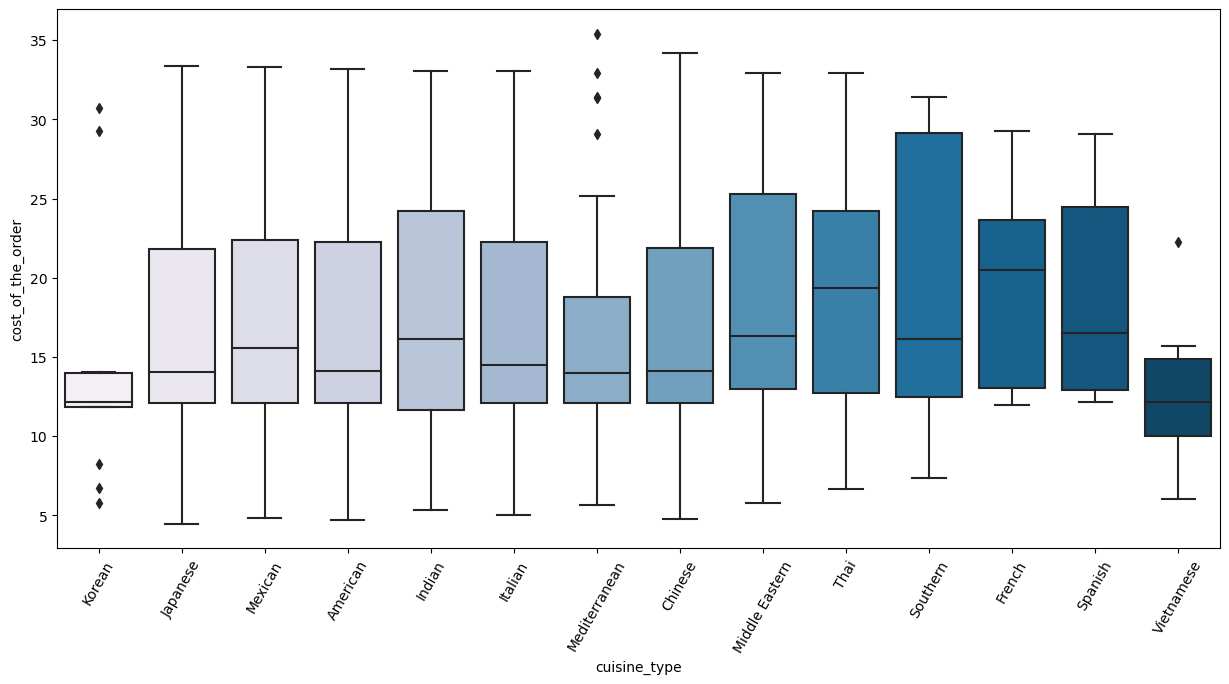

In [41]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

Cuisine vs Food Preparation time

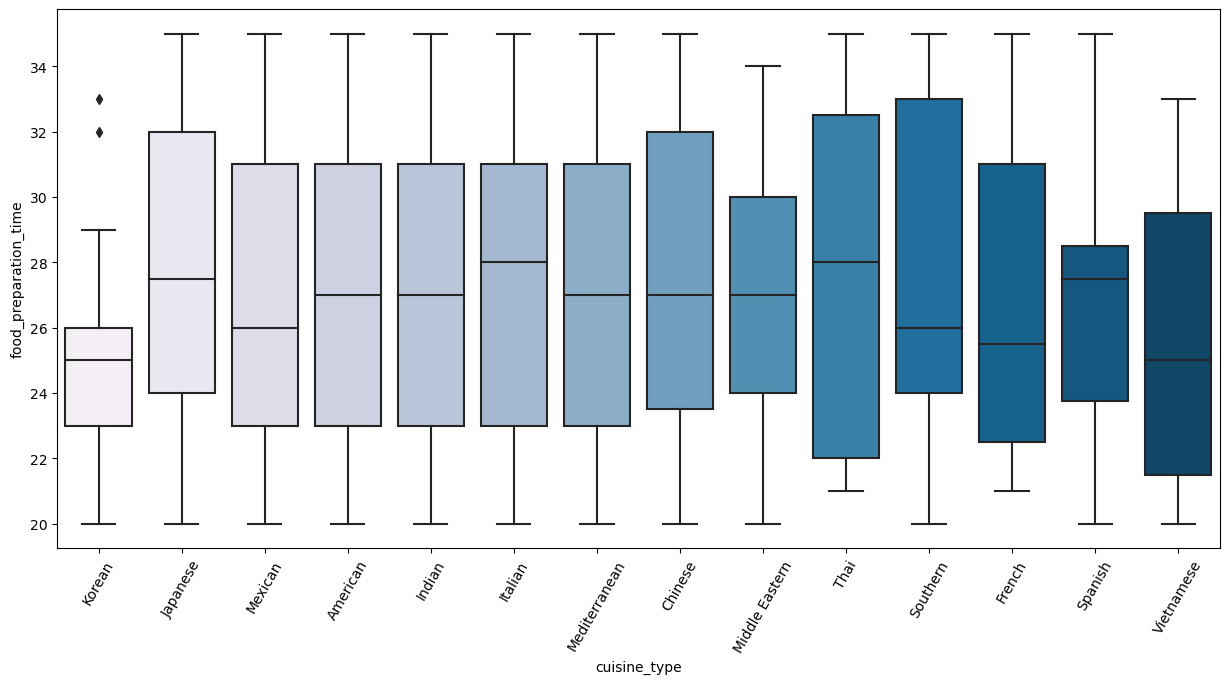

In [42]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show() 

Day of the Week vs Delivery time

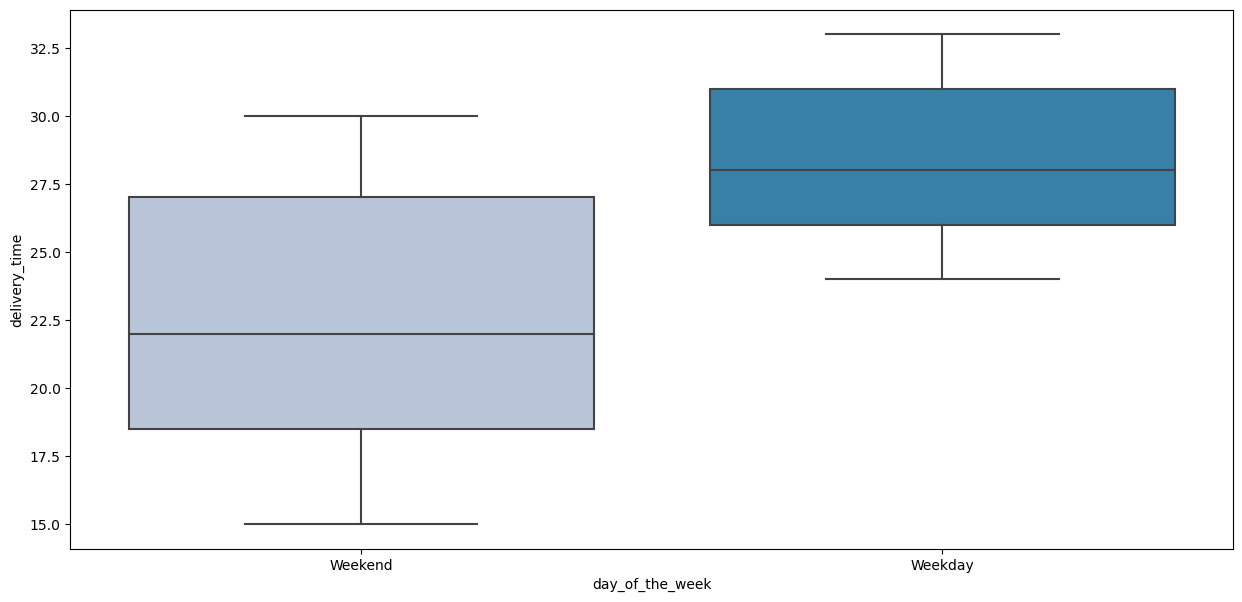

In [43]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

 Run the below code and write your observations on the revenue generated by the restaurants.

In [44]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

In [45]:
# Calculate the sum of the amount generated by the top 14 restaurants
top_14rev= df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14).sum()
top_14rev

16977.95

In [46]:
# Total cost in the data
total_rev=df['cost_of_the_order'].sum()
total_rev

31314.82

In [47]:
print('percentage of the top_14 is ',(top_14rev*100/total_rev))

percentage of the top_14 is  54.216980969394044


The top 14 restaurants generates 54.22 % of the total revenue in the data

Rating vs Delivery time

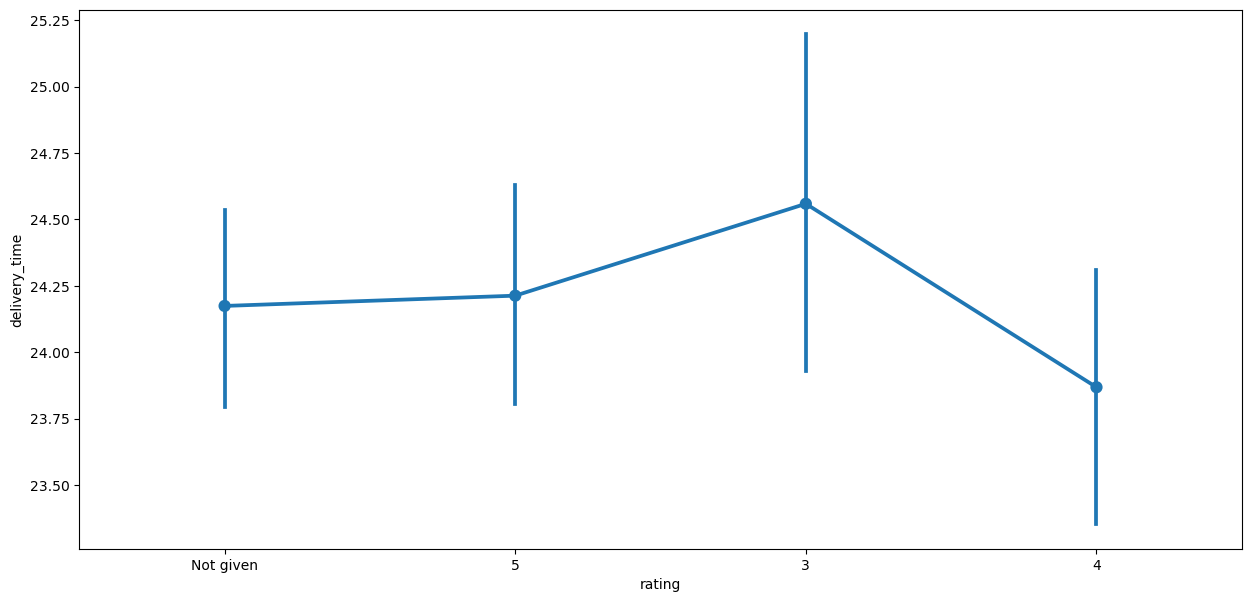

In [48]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

The highest delivery time has the lowest rating in the data

Rating vs Food preparation time

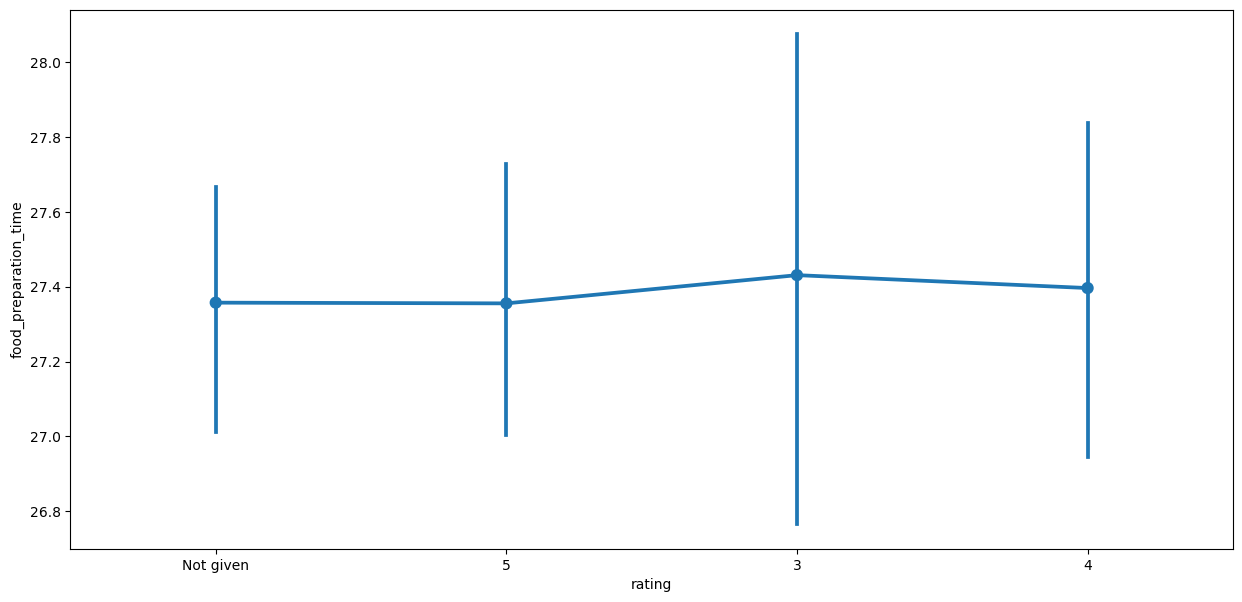

In [49]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

In [50]:
# df['rating'].corr(df['food_preparation_time'])

Rating vs Cost of the order

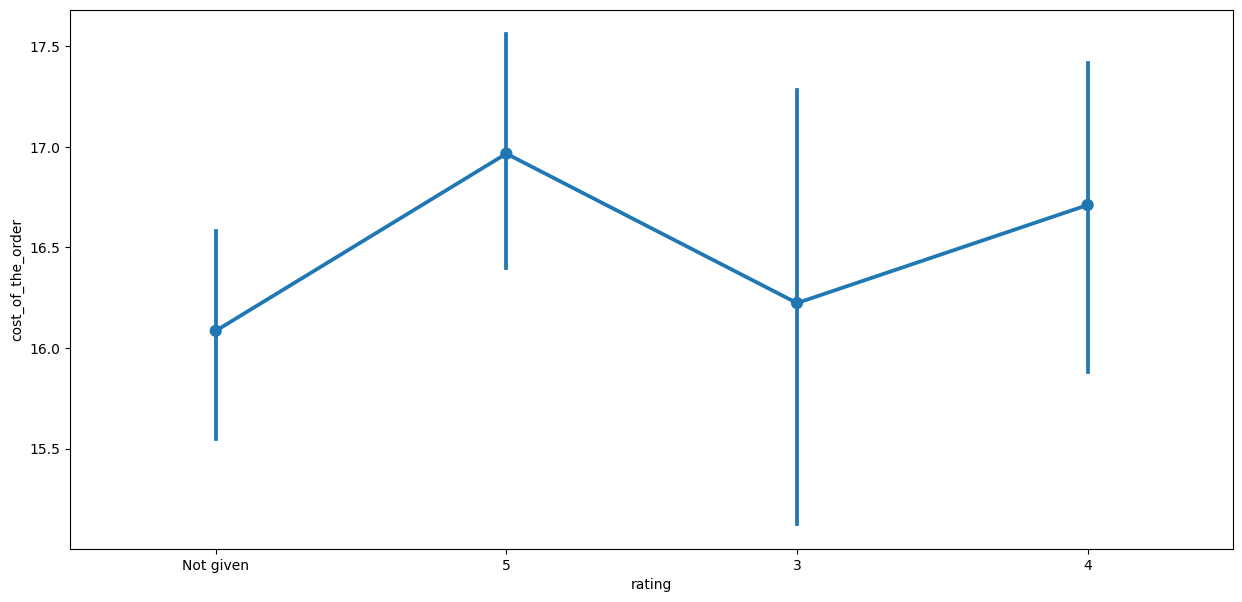

In [51]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

This plot shows that the higher the cost of the order, the higher the rating and therefore most unrated came from the lower cost order

Correlation among variables

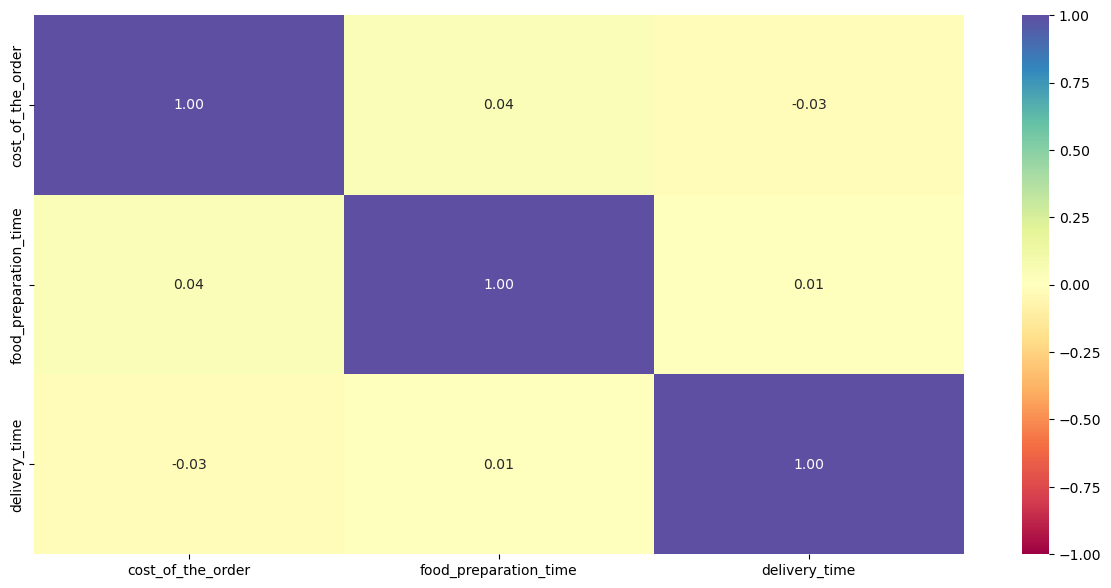

In [52]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

This plot shows that the correlation is positively highest between food preparation time and cost of order while the lowest correlation shows a negative correlation between delivery time and cost of order.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [1.5 marks]

In [53]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
# Create dataframe that contains rating count of more than 50
df_rating_more_than50= df_rating_count[df_rating_count['rating']>50].copy()
# Obtain the names of restaurants that have more than 50 ratings
rest_names= df_rating_more_than50['restaurant_name']

rest_names

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

In [54]:

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_meantable = df_mean_4.groupby('restaurant_name')['rating'].mean().sort_values(ascending = False).reset_index().dropna() 

# Obatin the data of restaurants that have mean rating more than 4
df_promotional_offer = df_meantable[df_meantable['rating']>4].copy()
df_promotional_offer

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:


The Meatball shop, Blue Ribbon Fried Chicken, Shake Shack and Blue Ribbon Sushi are qualified for the promotional offer

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [1.5 marks]

In [55]:
# This shows the minimum amount of order
df['cost_of_the_order'].min()

4.47

In [56]:
# The minimum cost is 4.47 which shows there is minimum of a order that is at most 5
# the dataframe of all orders that are at most 5 is thus obtained
df_uncaptured= df[df['cost_of_the_order']<=5].copy()
df_uncaptured

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
82,1477790,133617,Shake Shack,American,4.75,Weekday,4,35,28
390,1477196,50123,Cafe Habana,Mexican,4.85,Weekend,5,28,22
480,1476877,53289,The Loop,Japanese,4.66,Weekend,Not given,34,25
542,1477788,270444,P.J. Clarke's,American,4.71,Weekend,Not given,23,15
624,1477349,52327,Nobu Next Door,Japanese,4.47,Weekend,5,28,26
664,1476909,366975,Blue Ribbon Sushi Bar & Grill,Japanese,4.85,Weekend,5,20,21
889,1477787,14869,Shake Shack,American,4.80,Weekend,4,22,24
1569,1477786,145389,RedFarm Hudson,Chinese,4.75,Weekend,3,23,25
1695,1478302,318665,Blue Ribbon Sushi Bar & Grill,Japanese,4.90,Weekday,4,29,32


In [57]:
# the dataframe of all orders that are at most 5 is thus obtained
df_captured= df[df['cost_of_the_order']>5].copy()
captured_cost= df_captured['cost_of_the_order']
# initialize revenue
revenue=0
for item in captured_cost:
    if item >20:
        revenue= revenue+0.25*item
    else:
        revenue = revenue+0.15*item
print('The total revenue generated by the company is ', round(revenue,2))

The total revenue generated by the company is  6166.3


#### Observations:


The total revenue generated by the company for orders that cost at least 5 is  6166.30 dollars. It should be noted that the question is silent about orders that costs at most 5 which is why the amount charged was assumed to be zero.
Therefore total revenue generated for all orders is still 6166.30 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [1 marks]

In [58]:
# The code counts the number of orders whose sum of preparation and delivery time is greater than 60
count_time = 0
del_time= df['delivery_time']
food_preptime = df['food_preparation_time']
for xaa, yaa in zip(del_time,food_preptime):
    if(xaa+yaa)>60 :
        count+=1
    else:
        count = count
print("The percentage of the number of orders that take total time of more than 60 mins is ",round(count*100/len(del_time),3))
        


The percentage of the number of orders that take total time of more than 60 mins is  11.012


#### Observations:


The percentage of the number of orders that take total time of more than 60 mins is  43.941%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [1 marks]

In [59]:
# Code to obtain the mean delivery time to 2 decimal places since time is usually expressed in 2d.p
round(df.groupby('day_of_the_week')['delivery_time'].mean(),2)

day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64

#### Observations:


The mean delivery time is more for weekday at 28.34 minutes than for weekends which stands at 22.47 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [5 marks]

Conclusions:
*  Most orders comes during the weekend and more than 50% of the revenue from the data came from just 14 restaurants out of the 174 restaurants.
It is commendable that the mean delivery time is less during weekend which is when most orders are made.

### Recommendations:

*  

The company should get his dispatch riders more ready during weekends as the rush is much more during weekends which is just two days than during the week which is 5 days. And to get more detail to enhance plan analysis should be done on the time of order as well especially during the week when the density of order is less so that the time of concentration can be noted.


---